# Распознавение коэфициента полумаксимального ингибирования методами машинного обучения

IC50, или концентрация полумаксимального ингибирования, — показатель эффективности лиганда при ингибирующем биохимическом или биологическом взаимодействии. IC50 является количественным индикатором, который показывает, сколько нужно лиганда—ингибитора для ингибирования биологического процесса на 50 %.

Если же по-простому, то чем выше IC50 - тем более вероятно, что химическое соединение может быть лекарственным. IC50 рассчиывается против конкретного вируса или молекулы.

Ключевой модуль, который используется в обработке данных химических формул - rdkit. Это исвободно распространяемый модуль и программное обеспечение для обработки химических данных и использование методов машинного обучения.

In [15]:
!pip install rdkit

In [16]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors
from rdkit.Chem.Draw import IPythonConsole
from sklearn.preprocessing import FunctionTransformer

In [17]:
data = pd.read_excel('/content/35000.xlsx')
data.head()

,Unnamed: 0,Title,IC50,SMILES
0,NaN,CHEMBL2206459,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,NaN,CHEMBL3818159,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,NaN,CHEMBL1956716,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,NaN,CHEMBL1956715,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,NaN,CHEMBL4444029,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...


# QSAR
«Наиболее фундаментальной и привлекательной задачей химии
является не столько создание новых молекул, сколько создание
свойств» Дж. Хэммонд.

Задачей QSAR/QSPR является поиск
связи между структурой химических объектов (соединений, реакций, смесей, материалов и др.) и их свойствами (химическими, физическими, физико-химическими, биологическими и др.). С точки зрения математики, речь идет о построении статистической модели F, которая связывает дескрипторы X химического объекта (числовые характеристики, определяемые структурой объекта) с его свойствами Y:
<center>
$Y = F(X)$
</center>

## Представление молекул
Наиболее распространеное линейное представление молекулы - SMILES (англ. Simplified Molecular Input Line Entry System – система упрощенного представления молекул в строке ввода).

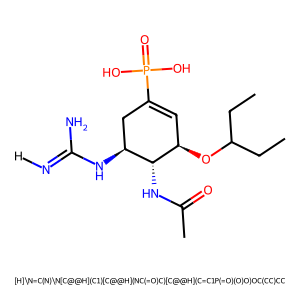

In [18]:
mol = Chem.MolFromSmiles(data['SMILES'][0])
Draw.MolToImage(mol,legend=data['SMILES'][0])

Тем не менее, очевидно, что представление в виде картинки не позволяет использовать модели машинного обучения. А значит, можно и нужно получать определенные числовы признаки. Это можно сделать так же с помощью rdkit.

В данном случае мы не рассматриваем разные варианты дискриптеров.

In [19]:
def mol_dsc_calc(mols):
    return pd.DataFrame({k: f(Chem.MolFromSmiles(m)) for k, f in descriptors.items()} for m in mols)

# список конституционных и физико-химических дескрипторов из библиотеки RDKit
descriptors = {"HeavyAtomCount": Descriptors.HeavyAtomCount,
               "NHOHCount": Descriptors.NHOHCount,
               "NOCount": Descriptors.NOCount,
               "NumHAcceptors": Descriptors.NumHAcceptors,
               "NumHDonors": Descriptors.NumHDonors,
               "NumHeteroatoms": Descriptors.NumHeteroatoms,
               "NumRotatableBonds": Descriptors.NumRotatableBonds,
               "NumValenceElectrons": Descriptors.NumValenceElectrons,
               "NumAromaticRings": Descriptors.NumAromaticRings,
               "NumAliphaticHeterocycles": Descriptors.NumAliphaticHeterocycles,
               "RingCount": Descriptors.RingCount,
               "MW": Descriptors.MolWt,
               "LogP": Descriptors.MolLogP,
               "MR": Descriptors.MolMR,
               "TPSA": Descriptors.TPSA}

# sklearn трансформер для использования в конвейерном моделировании
descriptors_transformer = FunctionTransformer(mol_dsc_calc)
X = descriptors_transformer.transform(data['SMILES'])
X.head()

[14:54:47] Conflicting single bond directions around double bond at index 55.
[14:54:47]   BondStereo set to STEREONONE and single bond directions set to NONE.
[14:54:47] Conflicting single bond directions around double bond at index 55.
[14:54:47]   BondStereo set to STEREONONE and single bond directions set to NONE.
[14:54:47] Conflicting single bond directions around double bond at index 55.
[14:54:47]   BondStereo set to STEREONONE and single bond directions set to NONE.
[14:54:47] Conflicting single bond directions around double bond at index 55.
[14:54:47]   BondStereo set to STEREONONE and single bond directions set to NONE.
[14:54:47] Conflicting single bond directions around double bond at index 55.
[14:54:47]   BondStereo set to STEREONONE and single bond directions set to NONE.
[14:54:47] Conflicting single bond directions around double bond at index 55.
[14:54:47]   BondStereo set to STEREONONE and single bond directions set to NONE.
[14:54:47] Conflicting single bond direc

,HeavyAtomCount,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumAliphaticHeterocycles,RingCount,MW,LogP,MR,TPSA
0,24,7,9,4,6,10,7,138,0,0,1,362.367,0.38187,90.4296,157.76
1,21,4,6,4,3,6,7,120,0,0,1,298.383,1.05450,79.7279,101.65
2,21,3,6,5,2,6,7,118,0,0,1,295.359,-0.36170,77.0531,104.48
3,20,3,6,5,2,6,6,114,0,0,1,283.348,-0.52780,72.5301,104.48
4,24,4,9,6,4,9,3,122,3,0,3,329.268,1.09742,81.9775,149.28


In [20]:
data = data.join(X)

In [21]:
data = data.drop("Unnamed: 0", axis = 1)

In [22]:
data.to_excel('data.xlsx')